<a href="https://colab.research.google.com/github/Collin-Campbell/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/LS_DS_422_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [129]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Ftrl
import seaborn as sns
import pandas as pd

In [102]:
def load_quickdraw10(path):
  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']

  class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

  # Need this line to randomly shuffle both the X & y at the same time.
  X, y = shuffle(X, y)

  # splitting training into 80% train and 20% test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  print('X_train shape = {}'.format(X_train.shape))
  print('y_train shape = {}'.format(y_train.shape))
  print('\n')
  print('X_test shape = {}'.format(X_test.shape))
  print('y_test shape = {}'.format(y_test.shape))
  print('\n \n')

  return X_train, X_test, y_train, y_test

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [131]:
def create_model(path, lr=.001, opt_name=Adam):


  X_train, X_test, y_train, y_test = load_quickdraw10(path)


  # Define the keras model
  model = Sequential()
  model.add(Dense(32, input_dim=784, activation='relu'))
  model.add(Dense(10, activation='softmax'))


  # Compile the keras model
  opt = opt_name(learning_rate=lr)

  model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  model.summary()

  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [118]:
model = create_model('quickdraw10.npz')

X_train shape = (80000, 784)
y_train shape = (80000,)


X_test shape = (20000, 784)
y_test shape = (20000,)

 

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_33 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [119]:
bt_8 = model.fit(X_train, y_train,
                                epochs=30,
                                batch_size=8,
                                validation_data=(X_test,y_test))

bt_32 = model.fit(X_train, y_train,
                                epochs=30,
                                batch_size=32,
                                validation_data=(X_test,y_test))

bt_64 = model.fit(X_train, y_train,
                                epochs=30,
                                batch_size=64,
                                validation_data=(X_test,y_test))

bt_128 = model.fit(X_train, y_train,
                                epochs=30,
                                batch_size=128,
                                validation_data=(X_test,y_test))

bt_256 = model.fit(X_train, y_train,
                                epochs=30,
                                batch_size=256,
                                validation_data=(X_test,y_test))

Epoch 1/30
10000/10000 [==============================] - 13s 1ms/step - loss: 1.9906 - accuracy: 0.3801 - val_loss: 1.5207 - val_accuracy: 0.4406
Epoch 2/30
10000/10000 [==============================] - 13s 1ms/step - loss: 1.3929 - accuracy: 0.4972 - val_loss: 1.3181 - val_accuracy: 0.5242
Epoch 3/30
10000/10000 [==============================] - 14s 1ms/step - loss: 1.2961 - accuracy: 0.5291 - val_loss: 1.2882 - val_accuracy: 0.5434
Epoch 4/30
10000/10000 [==============================] - 14s 1ms/step - loss: 1.2606 - accuracy: 0.5431 - val_loss: 1.2635 - val_accuracy: 0.5595
Epoch 5/30
10000/10000 [==============================] - 13s 1ms/step - loss: 1.2492 - accuracy: 0.5478 - val_loss: 1.2978 - val_accuracy: 0.5316
Epoch 6/30
10000/10000 [==============================] - 13s 1ms/step - loss: 1.2425 - accuracy: 0.5514 - val_loss: 1.2185 - val_accuracy: 0.5781
Epoch 7/30
10000/10000 [==============================] - 13s 1ms/step - loss: 1.2357 - accuracy: 0.5588 - val_loss: 1

In [122]:
batch_sizes = []

for exp, result in zip([bt_8, bt_32, bt_64, bt_128, bt_256], ["8_", "32_", "64_", "128_", "256_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,1.990578,0.380050,1.520665,0.44060,0,8_
1,1.392929,0.497212,1.318071,0.52415,1,8_
2,1.296130,0.529063,1.288229,0.54340,2,8_
3,1.260566,0.543137,1.263451,0.55950,3,8_
4,1.249231,0.547800,1.297813,0.53160,4,8_


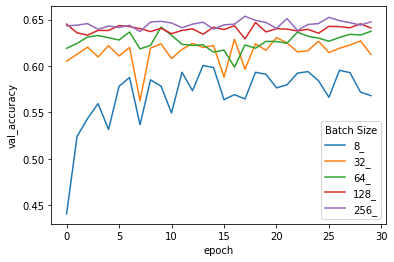

In [123]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

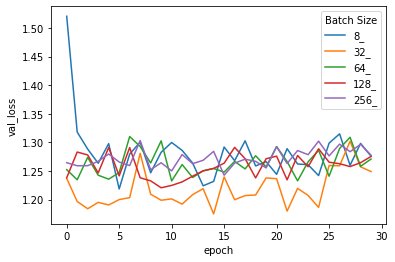

In [124]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [125]:
lr_1 = create_model('quickdraw10.npz', lr=1).fit(X_train, y_train,
                                epochs=30,
                                validation_data=(X_test,y_test)
)

lr_2 = create_model('quickdraw10.npz', lr=.1).fit(X_train, y_train,
                                epochs=30,
                                validation_data=(X_test,y_test)
)

lr_3 = create_model('quickdraw10.npz', lr=.01).fit(X_train, y_train,
                                epochs=30,
                                validation_data=(X_test,y_test)
)

lr_4 = create_model('quickdraw10.npz', lr=.001).fit(X_train, y_train,
                                epochs=30,
                                validation_data=(X_test,y_test)
)

lr_5 = create_model('quickdraw10.npz', lr=.0001).fit(X_train, y_train,
                                epochs=30,
                                validation_data=(X_test,y_test)
)

X_train shape = (80000, 784)
y_train shape = (80000,)


X_test shape = (20000, 784)
y_test shape = (20000,)

 

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
2500/2500 [==============================] - 4s 2ms/step - loss: 126.2143 - accuracy: 0.0987 - val_loss: 13.5142 - val_accuracy: 0.0997
Epoch 2/30
2500/2500 [==============================] - 4s 1ms/step - loss: 31.0156 - accuracy: 0.0998 - val_loss: 14.3648 - val_accuracy: 0.0997
Epoch 3/30
2500/2500 [==============================] - 4s 1ms/step - loss: 5.8912 - accuracy: 0.1014 - va

In [126]:
batch_sizes = []

for exp, result in zip([lr_1, lr_2, lr_3, lr_4, lr_5], ["1_", ".1_", ".01_", ".001_", ".0001_" ]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,126.214310,0.098675,13.514152,0.09965,0,1_
1,31.015553,0.099775,14.364791,0.09965,1,1_
2,5.891236,0.101350,14.432127,0.10100,2,1_
3,2.410744,0.101850,14.377234,0.09965,3,1_
4,2.412233,0.101275,14.369791,0.10125,4,1_


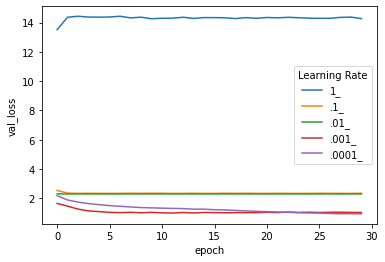

In [127]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

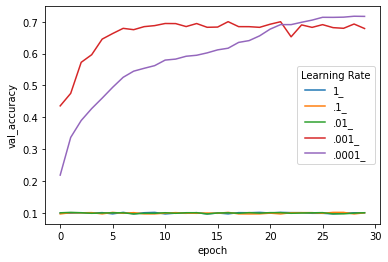

In [128]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [132]:
SGD_ = create_model('quickdraw10.npz', lr=.01, opt_name=SGD).fit(X_train, y_train,
                                epochs=30,
                                validation_data=(X_test,y_test)
)

Adam_ = create_model('quickdraw10.npz', lr=.001, opt_name=Adam).fit(X_train, y_train,
                                epochs=30,
                                validation_data=(X_test,y_test)
)

RMSprop_ = create_model('quickdraw10.npz', lr=.001, opt_name=RMSprop).fit(X_train, y_train,
                                epochs=30,
                                validation_data=(X_test,y_test)
)

Adagrad_ = create_model('quickdraw10.npz', lr=.001, opt_name=Adagrad).fit(X_train, y_train,
                                epochs=30,
                                validation_data=(X_test,y_test)
)

Ftrl_ = create_model('quickdraw10.npz', lr=.001, opt_name=Ftrl).fit(X_train, y_train,
                                epochs=30,
                                validation_data=(X_test,y_test)
)

X_train shape = (80000, 784)
y_train shape = (80000,)


X_test shape = (20000, 784)
y_test shape = (20000,)

 

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_45 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
2500/2500 [==============================] - 4s 1ms/step - loss: 3.8801 - accuracy: 0.1268 - val_loss: 2.2433 - val_accuracy: 0.1301
Epoch 2/30
2500/2500 [==============================] - 4s 1ms/step - loss: 2.2456 - accuracy: 0.1351 - val_loss: 2.2670 - val_accuracy: 0.1540
Epoch 3/30
2500/2500 [==============================] - 4s 1ms/step - loss: 2.2411 - accuracy: 0.1389 - val_los

In [133]:
batch_sizes = []

for exp, result in zip([SGD_, Adam_, RMSprop_, Adagrad_, Ftrl_], ["SGD_", "Adam_", "RMSprop_", "Adagrad_", "Ftrl_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Optimizer'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Optimizer'] = df['Optimizer'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Optimizer
0,3.880063,0.126825,2.243318,0.13010,0,SGD_
1,2.245576,0.135137,2.267020,0.15400,1,SGD_
2,2.241135,0.138887,2.229882,0.16340,2,SGD_
3,2.225611,0.147488,2.248684,0.12685,3,SGD_
4,2.236556,0.144825,2.201927,0.15295,4,SGD_


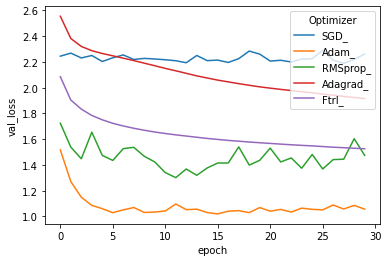

In [134]:
sns.lineplot(x='epoch', y='val_loss', hue='Optimizer', data=df);

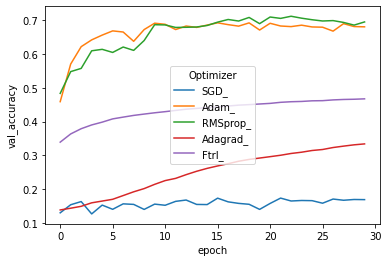

In [135]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Optimizer', data=df);

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Backpropagation takes the output of a neural network, compares it to a known result, and adjusts variables (weights) within the network so that when ran again, the results will be closer to the known results.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


